<a href="https://colab.research.google.com/github/Mrfrktmrck19/Data_Science/blob/master/Data%20Augmentation/DataAugWithTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [2]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

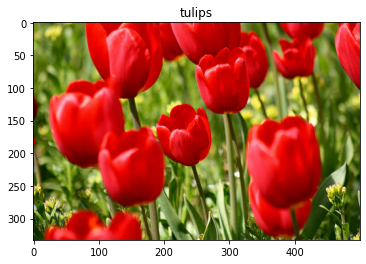

In [3]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [4]:
#How many classes does the dataset have?
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


In [5]:
#Lets use following function to visualize and compare the original and augmented images side by side.
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

In [6]:
## Data Augmentation Methods in Tenserflow

In [7]:
#    1. Flip an Image
#Flip an image either vertically or horizontally with tf.image.flip_left_right: 

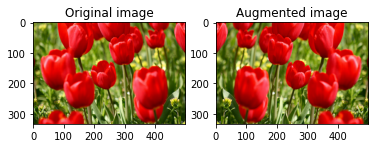

In [8]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

In [9]:
#   2.Grayscale an image

In [10]:
#You can grayscale an image with tf.image.rgb_to_grayscale:

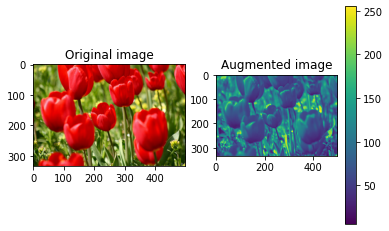

In [11]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

In [12]:
#   3.Saturate an image

In [13]:
#Saturate an image with tf.image.adjust_saturation by providing a saturation factor:

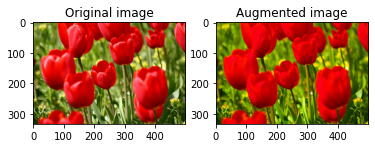

In [14]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

In [15]:
#   4.Change image brightness

In [16]:
#Change the brightness of image with tf.image.adjust_brightness by providing a brightness factor:

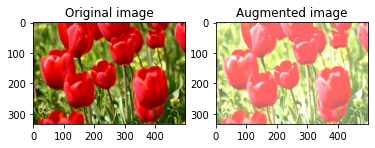

In [17]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

In [18]:
#   5.Center crop an image

In [19]:
#Crop the image from center up to the image part you desire using tf.image.central_crop:

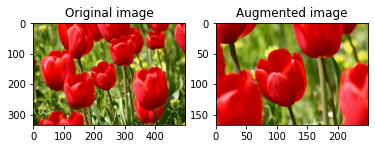

In [20]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image, cropped)

In [21]:
#   6.Rotate an image

In [22]:
#Rotate an image by 90 degrees with tf.image.rot90:

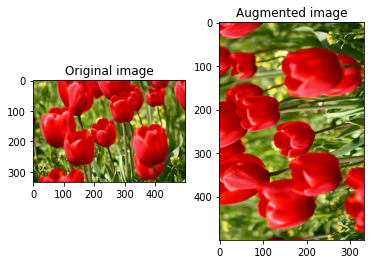

In [23]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

In [24]:
#   7.Random Transformation

In [25]:
"""
 Applying random transformations to the images can further help generalize and expand the dataset.
 The current tf.image API provides eight such random image operations (ops):
  * tf.image.stateless_random_brightness
  * tf.image.stateless_random_contrast
  * tf.image.stateless_random_crop
  * tf.image.stateless_random_flip_left_right
  * tf.image.stateless_random_flip_up_down
  * tf.image.stateless_random_hue
  * tf.image.stateless_random_jpeg_quality
  * tf.image.stateless_random_saturation
"""
#btw you shoul not use tf.image.random*. Because this lib still use old RNGs from TF 1.x

'\n Applying random transformations to the images can further help generalize and expand the dataset.\n The current tf.image API provides eight such random image operations (ops):\n  * tf.image.stateless_random_brightness\n  * tf.image.stateless_random_contrast\n  * tf.image.stateless_random_crop\n  * tf.image.stateless_random_flip_left_right\n  * tf.image.stateless_random_flip_up_down\n  * tf.image.stateless_random_hue\n  * tf.image.stateless_random_jpeg_quality\n  * tf.image.stateless_random_saturation\n'

In [26]:
#   7.1. Randomly change image brightness

Randomly change the brightness of image using tf.image.stateless_random_brightness by providing a brightness factor and seed. The brightness factor is chosen randomly in the range [-max_delta, max_delta) and is associated with the given seed.

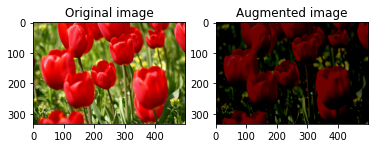

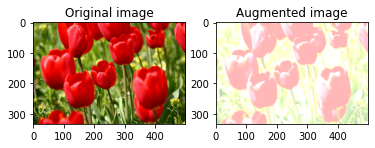

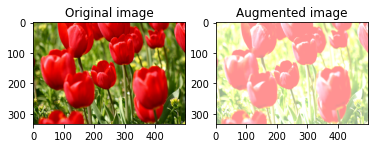

In [27]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_brightness = tf.image.stateless_random_brightness(
      image, max_delta=0.95, seed=seed)
  visualize(image, stateless_random_brightness)

In [28]:
#   7.2. Randomly change image contrast

Randomly change the contrast of image using tf.image.stateless_random_contrast by providing a contrast range and seed. The contrast range is chosen randomly in the interval [lower, upper] and is associated with the given seed.



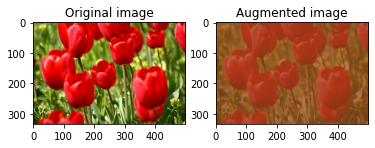

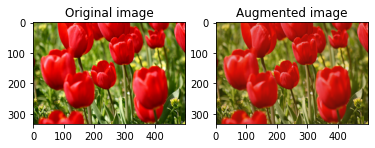

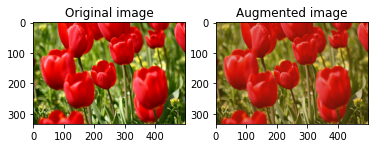

In [29]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_contrast = tf.image.stateless_random_contrast(
      image, lower=0.1, upper=0.9, seed=seed)
  visualize(image, stateless_random_contrast)

In [30]:
#   7.4. Randomly crop an image

Randomly crop image using tf.image.stateless_random_crop by providing target size and seed. The portion that gets cropped out of image is at a randomly chosen offset and is associated with the given seed.



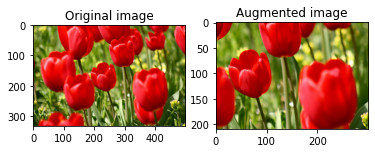

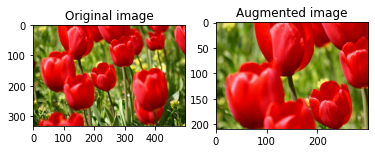

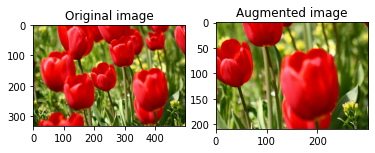

In [31]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_crop = tf.image.stateless_random_crop(
      image, size=[210, 300, 3], seed=seed)
  visualize(image, stateless_random_crop)

In [32]:
# Apply Augmentation to a Dataset



(train_datasets, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Let's first download the image dataset again in case they are modified in the previous sections.

Next, define a utility function for resizing and rescaling the images. This function will be used in unifying the size and scale of images in the dataset:


In [33]:
def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image, label

In [34]:
def augment(image_label, seed):
  image, label = image_label
  image, label = resize_and_rescale(image, label)
  image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
  # Make a new seed.
  new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  # Random crop back to the original size.
  image = tf.image.stateless_random_crop(
      image, size=[IMG_SIZE, IMG_SIZE, 3], seed=seed)
  # Random brightness.
  image = tf.image.stateless_random_brightness(
      image, max_delta=0.5, seed=new_seed)
  image = tf.clip_by_value(image, 0, 1)
  return image, label

Let's also define the augment function that can apply the random transformations to the images. This function will be used on the dataset in the next step.


In [35]:
# Option 1: Using tf.data.experimental.Counter

Create a tf.data.experimental.Counter object (let's call it counter) and Dataset.zip the dataset with (counter, counter). This will ensure that each image in the dataset gets associated with a unique value (of shape (2,)) based on counter which later can get passed into the augment function as the seed value for random transformations.

In [36]:
# Create a `Counter` object and `Dataset.zip` it together with the training set.
counter = tf.data.experimental.Counter()
train_ds = tf.data.Dataset.zip((train_datasets, (counter, counter)))

In [37]:
#Map the augment function to the training dataset:
"""
train_ds = (
    train_ds
    .shuffle(1000)
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)
val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)
test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)
"""

'\ntrain_ds = (\n    train_ds\n    .shuffle(1000)\n    .map(augment, num_parallel_calls=AUTOTUNE)\n    .batch(batch_size)\n    .prefetch(AUTOTUNE)\n)\nval_ds = (\n    val_ds\n    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)\n    .batch(batch_size)\n    .prefetch(AUTOTUNE)\n)\ntest_ds = (\n    test_ds\n    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)\n    .batch(batch_size)\n    .prefetch(AUTOTUNE)\n)\n'

In [38]:
#  Option 2: Using tf.random.Generator

Create a tf.random.Generator object with an initial seed value. Calling the make_seeds function on the same generator object always returns a new, unique seed value.
Define a wrapper function that: 1) calls the make_seeds function; and 2) passes the newly generated seed value into the augment function for random transformations.

In [39]:
# Create a generator.
rng = tf.random.Generator.from_seed(123, alg='philox')

In [40]:
# Create a wrapper function for updating seeds.
def f(x, y):
  seed = rng.make_seeds(2)[0]
  image, label = augment((x, y), seed)
  return image, label

In [43]:
#Map the wrapper function f to the training dataset, and the resize_and_rescale function—to the validation and test sets:
"""
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE
train_ds = (
    train_datasets
    .shuffle(1000)
    .map(f, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

"""

'\nbatch_size = 32\nAUTOTUNE = tf.data.AUTOTUNE\ntrain_ds = (\n    train_datasets\n    .shuffle(1000)\n    .map(f, num_parallel_calls=AUTOTUNE)\n    .batch(batch_size)\n    .prefetch(AUTOTUNE)\n)\n\nval_ds = (\n    val_ds\n    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)\n    .batch(batch_size)\n    .prefetch(AUTOTUNE)\n)\n\ntest_ds = (\n    test_ds\n    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)\n    .batch(batch_size)\n    .prefetch(AUTOTUNE)\n)\n\n'